In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Stunting_Dataset.csv')

In [4]:
df.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [6]:
df = df.rename(columns={'Age': 'Age_Per_Month'})
df = df.rename(columns={'Birth Weight': 'Birth_Weight'})
df = df.rename(columns={'Birth Length': 'Birth_Length'})
df = df.rename(columns={'Body Weight': 'Body_Weight'})
df = df.rename(columns={'Body Length': 'Body_Length'})

In [7]:
# Menggunakan one-hot encoding dengan nilai 0 dan 1
df['Breastfeeding'] = df['Breastfeeding'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Stunting'] = df['Stunting'].apply(lambda x: 1 if x == 'Yes' else 0)

# Mengubah tipe data menjadi int64
df['Stunting'] = df['Stunting'].astype('int64')
df['Breastfeeding'] = df['Breastfeeding'].astype('int64')

In [8]:
df.head(10)

,Gender,Age_Per_Month,Birth_Weight,Birth_Length,Body_Weight,Body_Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,0,0
1,Female,11,2.9,49,2.9,65.0,0,1
2,Male,16,2.9,49,8.5,72.2,0,1
3,Male,31,2.8,49,6.4,63.0,0,1
4,Male,15,3.1,49,10.5,49.0,0,1
5,Female,11,2.8,49,8.5,65.0,0,0
6,Male,35,2.8,49,10.5,72.2,0,1
7,Female,17,2.8,49,8.0,63.0,0,1
8,Female,10,2.7,49,8.4,73.5,0,0
9,Female,16,2.8,49,8.5,65.0,0,1


In [9]:
df.isna().sum()

Gender           0
Age_Per_Month    0
Birth_Weight     0
Birth_Length     0
Body_Weight      0
Body_Length      0
Breastfeeding    0
Stunting         0
dtype: int64

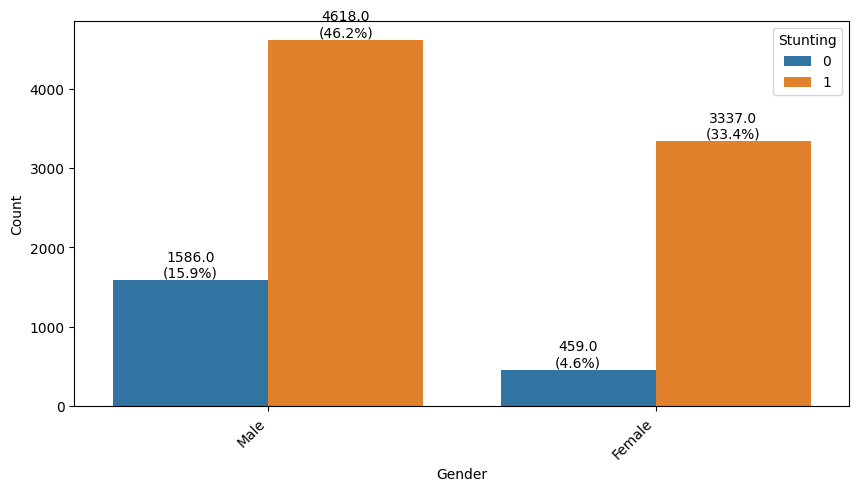

In [10]:
plt.figure(figsize=(10, 5))

# Menghitung jumlah total data untuk setiap kategori 'Gender'
total_counts = df['Gender'].value_counts()

# Membuat countplot dengan fitur 'Gender' sebagai sumbu x dan 'Stunting' sebagai hue
ax = sns.countplot(x='Gender', hue='Stunting', data=df)

# Menambahkan persentase dan angka jumlah di atas setiap baris
def annotate_perc_and_count(ax):
    total_height = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total_height * 100
        ax.annotate(f'{height}\n({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Memanggil fungsi untuk menambahkan persentase dan jumlah pada plot
annotate_perc_and_count(ax)

# Menyembunyikan nilai pada sumbu x agar tampilan menjadi lebih rapi
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Gender')
plt.ylabel('Count')

# Menampilkan legenda
plt.legend(title='Stunting')

# Tampilkan plot dengan persentase dan jumlah angka di atas setiap baris
plt.show()


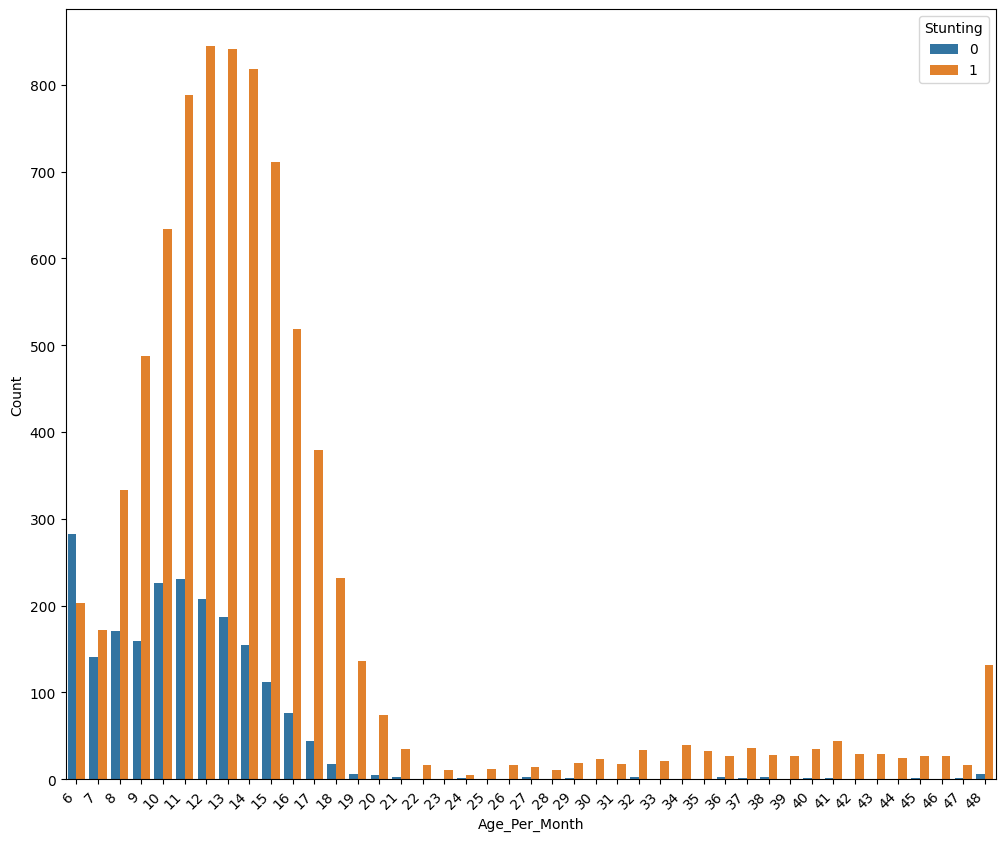

In [11]:
plt.figure(figsize=(12, 10))

# Membuat countplot dengan fitur 'Age_Per_Month' sebagai sumbu x dan 'Stunting' sebagai hue
ax = sns.countplot(x='Age_Per_Month', hue='Stunting', data=df)

# Menyembunyikan nilai pada sumbu x agar tampilan menjadi lebih rapi
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Age_Per_Month')
plt.ylabel('Count')

# Menampilkan legenda
plt.legend(title='Stunting')

# Tampilkan plot
plt.show()

<AxesSubplot:>

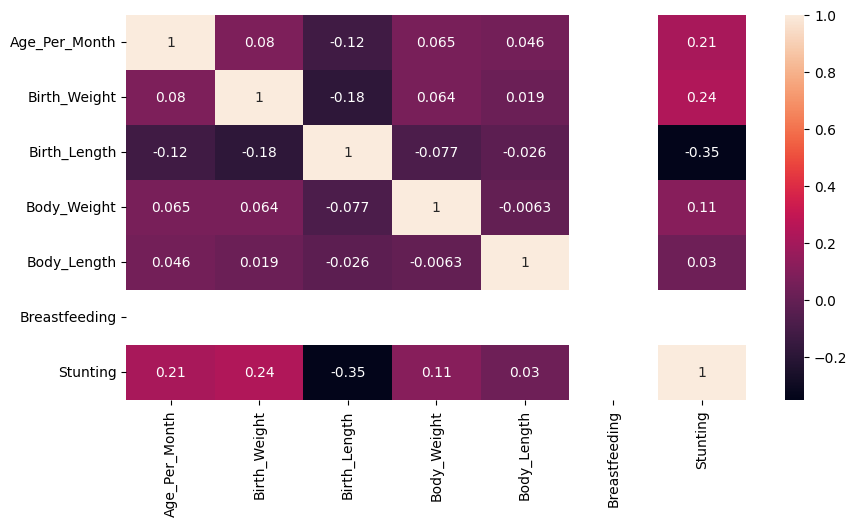

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [13]:
df = df.drop(columns=['Breastfeeding'])

In [14]:
df.columns

Index(['Gender', 'Age_Per_Month', 'Birth_Weight', 'Birth_Length',
       'Body_Weight', 'Body_Length', 'Stunting'],
      dtype='object')

<AxesSubplot:>

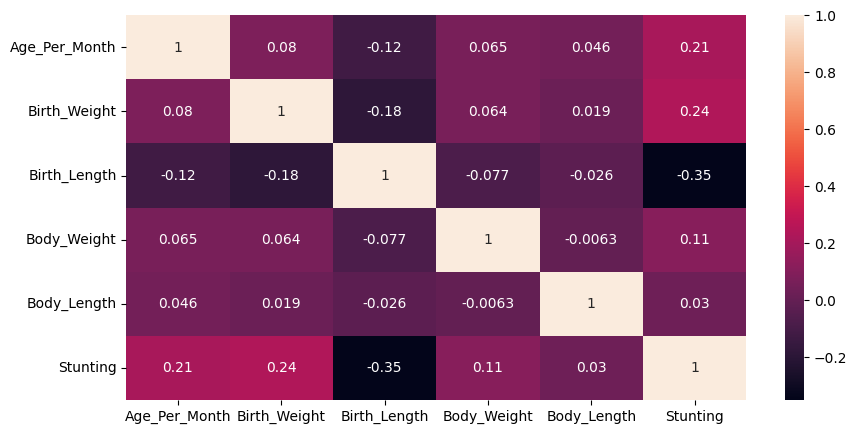

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)